c:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace\DL-Excersize\notebooks\DL3_20241006\ch05
c:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace\DL-Excersize\notebooks\DL3_20241006
===========iteration:0===========
std=0.01:2.3025275696217653
Xavier:2.3047408267196268
He:2.376359919159606
===========iteration:100===========
std=0.01:2.3033508661499855
Xavier:2.249216370149397
He:1.5057693509406902
===========iteration:200===========
std=0.01:2.3031390204126616
Xavier:2.0950568233133255
He:0.6652617971424147
===========iteration:300===========
std=0.01:2.3013209361575697
Xavier:1.7527548959464825
He:0.5238234052666448
===========iteration:400===========
std=0.01:2.301521601525301
Xavier:1.227540220520449
He:0.47336349332203054
===========iteration:500===========
std=0.01:2.301978594194635
Xavier:0.783204027183198
He:0.42838996955899783
===========iteration:600===========
std=0.01:2.3011694985571176
Xavier:0.6232566648611573
He:0.2937787092221265
===========iteration:700=========

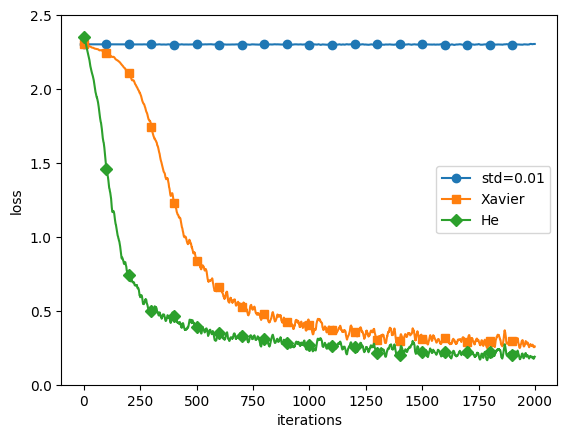

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
# 비교할 가중치 초기값들을 딕셔너리(dictionary)로 정의합니다.
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)

for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()
